# Data Aggregation
The data set is a CSV file called World_Happiness_2015.csv. Below are descriptions for some of the columns we'll be working with:

- Country - Name of the country.
- Region - Name of the region the country belongs to.
- Happiness Rank - The rank of the country, as determined by its happiness score.
- Happiness Score - A score assigned to each country based on the answers to a poll question that asks respondents to rate their happiness on a scale of 0-10.
- Family - The estimated extent to which family contributes to the happiness score.
- Freedom - The estimated extent to which freedom contributes to the happiness score.
- Generosity - The estimated extent to which generosity contributes to the happiness score.
To start, let's read our data set into a pandas dataframe and inspect it.

### Instructions

- Use the pd.read_csv() function to read the World_Happiness_2015.csv file into a dataframe called happiness2015.
- Store the first five rows of the dataframe in a variable called first_5.
- Use the DataFrame.info() method to print information about the dataframe.
- After you have run your code, use the variable inspector to look at the variable first_5 and the output to get familiar with the data.

In [1]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style('white', {'axes.spines.left': False,
                         'axes.spines.bottom': False,
                         'axes.spines.right': False,
                         'axes.spines.top': False})

In [2]:

happiness2015 = pd.read_csv('World_Happiness_2015.csv')
first_5 = happiness2015.iloc[0:5]
display(first_5)
happiness2015.info()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
Country                          158 non-null object
Region                           158 non-null object
Happiness Rank                   158 non-null int64
Happiness Score                  158 non-null float64
Standard Error                   158 non-null float64
Economy (GDP per Capita)         158 non-null float64
Family                           158 non-null float64
Health (Life Expectancy)         158 non-null float64
Freedom                          158 non-null float64
Trust (Government Corruption)    158 non-null float64
Generosity                       158 non-null float64
Dystopia Residual                158 non-null float64
dtypes: float64(9), int64(1), object(2)
memory usage: 14.9+ KB


First, let's visualize the happiness score of each country in happiness2015:

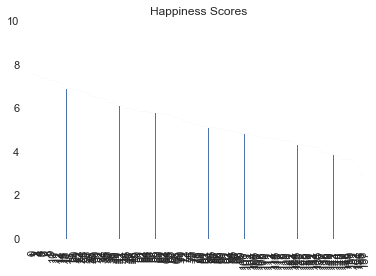

In [3]:
happiness2015['Happiness Score'].plot(kind='bar', title='Happiness Scores', ylim=(0,10))

Plotting the data in its current form isn't helpful at all! There are so many data points that we can't see any of the values or labels.

You may have noticed that each country in the happiness2015 dataframe is assigned to a region, specified in the Region column. We can use the Series.unique() method to confirm the unique regions:

In [4]:
happiness2015['Region'].unique()

array(['Western Europe', 'North America', 'Australia and New Zealand',
       'Middle East and Northern Africa', 'Latin America and Caribbean',
       'Southeastern Asia', 'Central and Eastern Europe', 'Eastern Asia',
       'Sub-Saharan Africa', 'Southern Asia'], dtype=object)

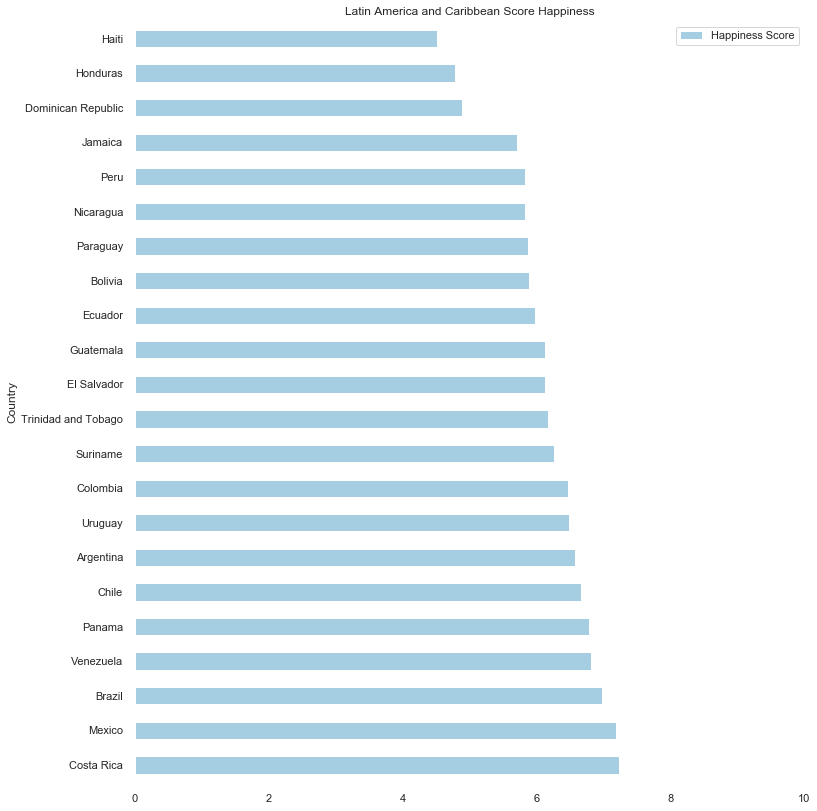

In [5]:
latin = happiness2015[happiness2015['Region'] == 'Latin America and Caribbean']
latin.plot(x='Country', y='Happiness Score', kind='barh', 
           colormap='Paired',  title='Latin America and Caribbean Score Happiness', 
           xlim=(0,10), figsize=(12,14))

In this mission, we'll learn how to perform different kinds of aggregations, applying a statistical operation to groups of our data, and create visualizations like the one above.

Recall that in the Pandas Fundamentals course, we learned a way to use loops for aggregation. Our process looked like this:

- Identify each unique group in the data set.
#### For each group:
- Select only the rows corresponding to that group.
- Calculate the average for those rows.
- Let's use the same process to find the mean happiness score for each region.

### Instructions

- Create an empty dictionary named mean_happiness to store the results of this exercise.
- Use the Series.unique() method to create an array of unique values for the Region column.
- Use a for loop to iterate over the unique region values from the Region column.
- Assign the rows belonging to the current region to a variable named region_group.
- Use the Series.mean() method to calculate the mean happiness score for region_group.
- Assign the mean value to the mean_happiness dictionary, using the region name as the key and the mean happiness score as the value.

In [6]:
mean_happiness = {}
unique_regions = happiness2015.Region.unique()
for region in unique_regions:
    region_group = happiness2015.loc[happiness2015.Region == region,'Happiness Score']
    mean_happiness[region] = region_group.mean()
    del region_group
mean_happiness

{'Western Europe': 6.689619047619048,
 'North America': 7.273,
 'Australia and New Zealand': 7.285,
 'Middle East and Northern Africa': 5.406899999999999,
 'Latin America and Caribbean': 6.144681818181818,
 'Southeastern Asia': 5.317444444444445,
 'Central and Eastern Europe': 5.332931034482758,
 'Eastern Asia': 5.626166666666666,
 'Sub-Saharan Africa': 4.202800000000001,
 'Southern Asia': 4.580857142857143}

Let's break down the code we wrote in the previous screen into three steps:

- Split the dataframe into groups.
- Apply a function to each group.
- Combine the results into one data structure.
- mean_happiness = {}
--regions = happiness2015['Region'].unique()
```python
for r in regions:
    #1. Split the dataframe into groups.
    region_group = happiness2015[happiness2015['Region'] == r]
    #2. Apply a function to each group.
    region_mean = region_group['Happiness Score'].mean()
    #3. Combine the results into one data structure.
    mean_happiness[r] = region_mean
```
![splitcombine](split_apply_combine.svg)

As with many other common tasks, pandas has a built-in operation for this process. The groupby operation performs the "split-apply-combine" process on a dataframe, but condenses it into two steps:

- Create a GroupBy object.
- Call a function on the GroupBy object.
The GroupBy object, distinct from a dataframe or series object, allows us to split the dataframe into groups, but only in an abstract sense. Nothing is actually computed until a function is called on the GroupBy object.

You can think of the groupby operation like this. Imagine a dataframe as a structure made of stacking blocks in all different colors and sizes.
![structuregroupby](Groupby_Mapping.svg)

You know you'll eventually want to group the blocks according to color instead, but you don't know yet what you want to do with them after. Using the groupby process, we would first create a mapping document, the GroupBy object, containing information on how to group the blocks by color and where each block is located in the original structure.
Once we create the mapping document, we can use it to easily rearrange the blocks into different structures. For example, let's say our manager asks us first to build another structure using the biggest block from each color.
Then, she asks us to build another structure using the block size the appears most frequently in each color.

![frequent](Groupby_Frequent.svg)

Creating the initial mapping document, or GroupBy object, allows us to optimize our work, because we no longer have to refer back to the original dataframe. By working with the groupby operation, we make our code faster, more flexible, and easier to read.


To create a GroupBy object, we use the DataFrame.groupby() method:
```python
df.groupby('col')
```
where col is the column you want to use to group the data set. Note that you can also group the data set on multiple columns by passing a list into the DataFrame.groupby() method. However, for teaching purposes, we'll focus on grouping the data by just one column in this mission.

When choosing the column, think about which columns could be used to split the data set into groups. To put it another way, look at columns with the same value for multiple rows.

![groups](Groups.svg)

We can see from the couple of rows above that the Region column fits this criteria. Let's confirm the number of regions and the number of unique values in each region for the entire dataframe with the Series.value_counts() method next:
```python
happiness2015['Region'].value_counts()
Sub-Saharan Africa                 40
Central and Eastern Europe         29
Latin America and Caribbean        22
Western Europe                     21
Middle East and Northern Africa    20
Southeastern Asia                   9
Southern Asia                       7
Eastern Asia                        6
Australia and New Zealand           2
North America                       2
Name: Region, dtype: int64
```
Since there's a small number of groups and each group contains more than one unique value, we can confirm the Region column is a good candidate to group by.

Next, let's create a Groupby object and group the dataframe by the Region column:
```python
happiness2015.groupby('Region')
```
Finally, let's print the results:
```python
print(happiness2015.groupby('Region'))
< pandas.core.groupby.groupby.DataFrameGroupBy object at 0x7f77882fa470 >
```
Don't be alarmed! This isn't an error. This is telling us that an object of type GroupBy was returned, just like we expected.

Before our we start aggregating data, we'll build some intuition around GroupBy objects. We'll start by using the GroupBy.get_group() method to select data for a certain group.

As an example, to select the data for just the North America group, we'd pass 'North America' into the get_group() method as follows:
```python
grouped = happiness2015.groupby('Region')
grouped.get_group('North America')
```python
Let's practice next.

### Instructions

- Use the df.groupby() method to group happiness2015 by the Region column. Assign the result to grouped.
- Use the GroupBy.get_group() method to select the data for the Australia and New Zealand group only. Assign the result to aus_nz.


In [7]:
grouped = happiness2015.groupby('Region')
aus_nz = grouped.get_group('Australia and New Zealand')
aus_nz

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
8,New Zealand,Australia and New Zealand,9,7.286,0.03371,1.25018,1.31967,0.90837,0.63938,0.42922,0.47501,2.26425
9,Australia,Australia and New Zealand,10,7.284,0.04083,1.33358,1.30923,0.93156,0.65124,0.35637,0.43562,2.26646


We can also use the GroupBy.groups attribute to get more information about the GroupBy object:
```python
grouped = happiness2015.groupby('Region')
grouped.groups
The result is a dictionary in which each key corresponds to a region name. See below for the first couple of keys:

{'Australia and New Zealand': Int64Index([8, 9], dtype='int64'),
 'Central and Eastern Europe': Int64Index([ 30,  43,  44,  51,  53,  54,  55,  58,  59,  61,  63,  68,  69,
              72,  76,  79,  82,  85,  86,  88,  92,  94,  95, 103, 105, 110, 126, 129, 133], dtype='int64'),
 'Eastern Asia': Int64Index([37, 45, 46, 71, 83, 99],dtype='int64'),
 'Latin America and Caribbean': Int64Index([ 11,  13,  15,  22,  24,  26,  29,  31,  32,  39,  40,  41,  42,
              47,  50,  52,  56,  57,  64,  97, 104, 118], dtype='int64'),
 'Middle East and Northern Africa': Int64Index([ 10,  19,  21,  27,  34,  38,  48,  62,  67,  75,  81,  91, 
              102, 106, 107, 109, 111, 134, 135, 155],dtype='int64'),
 'North America': Int64Index([4, 14], dtype='int64'),
 
 }
```
Notice that the values include the index for each row in the original happiness2015 dataframe with the corresponding region name. To prove this, let's again look at the data for the Australia and New Zealand group:
```python
'Australia and New Zealand': Int64Index([8, 9], dtype='int64')
```
Then, let's filter on indexes 8 and 9 in happiness2015:
```python
happiness2015.iloc[8:10]
Country	Region	Happiness Rank	Happiness Score	Standard Error	Economy (GDP per Capita)	Family	Health (Life Expectancy)	Freedom	Trust (Government Corruption)	Generosity	Dystopia Residual
8	New Zealand	Australia and New Zealand	9	7.286	0.03371	1.25018	1.31967	0.90837	0.63938	0.42922	0.47501	2.26425
9	Australia	Australia and New Zealand	10	7.284	0.04083	1.33358	1.30923	0.93156	0.65124	0.35637	0.43562	2.26646
```
And we see that those rows correspond to Australia and New Zealand! Notice that the *get_group()* method also returned the same dataframe above.

Next, let's continue building our intuition by practicing using the groups attribute and *get_group()* method.

### Instructions

#### For the following exercise, use the result from the dictionary returned by *grouped.groups* shown below:
```python
'North America': Int64Index([4, 14], dtype='int64'
```
Prove that the values for the 'North America' group in the dictionary returned by grouped.groups above correspond to countries in North America in the happiness2015 dataframe.
- Use the snippet above to identify the indexes of the countries in happiness2015 that belong to the North America group.
- Use the indexes to assign just the countries in North America in happiness2015 to north_america.
- Use the GroupBy.get_group() method to select the data for the North America group only. Assign the result to na_group.
- Use the following code to compare north_america and na_group: north_america == na_group. Assign the result to equal.

In [8]:
north_america = happiness2015.iloc[[4,14]]
na_group = happiness2015.groupby('Region').get_group('North America')
north_america == na_group


,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
4,True,True,True,True,True,True,True,True,True,True,True,True
14,True,True,True,True,True,True,True,True,True,True,True,True


A basic example of aggregation is computing the number of rows for each of the groups. We can use the GroupBy.size() method to confirm the size of each region group:

In [9]:
grouped = happiness2015.groupby('Region')
grouped.size()

Region
Australia and New Zealand           2
Central and Eastern Europe         29
Eastern Asia                        6
Latin America and Caribbean        22
Middle East and Northern Africa    20
North America                       2
Southeastern Asia                   9
Southern Asia                       7
Sub-Saharan Africa                 40
Western Europe                     21
dtype: int64

Notice that the result is a Series and contains just one value for each group. Each value represents the number of rows in each group. For example, the 'Australia and New Zealand' group contains two rows.

Pandas has built in a number of other common aggregation methods:

### Methods	Description
- **mean()**	Calculates the mean of groups.
- **sum()**	Calculates the sum of group values.
- **size()**	Calculates the size of the groups.
- **count()**	Calculates the count of values in groups.
- **min()**	Calculates the minimum of group values.
- **max()**	Calculates the maximum of group values.

Let's practicing use one of these aggregation methods next.

### Instructions

- Apply the **GroupBy.mean()** method to grouped. Assign the result to means.

In [10]:
mean = grouped.mean()
mean.T

Region,Australia and New Zealand,Central and Eastern Europe,Eastern Asia,Latin America and Caribbean,Middle East and Northern Africa,North America,Southeastern Asia,Southern Asia,Sub-Saharan Africa,Western Europe
Happiness Rank,9.500000,79.000000,64.500000,46.909091,77.600000,10.000000,81.222222,113.142857,127.900000,29.523810
Happiness Score,7.285000,5.332931,5.626167,6.144682,5.406900,7.273000,5.317444,4.580857,4.202800,6.689619
Standard Error,0.037270,0.045208,0.037225,0.061127,0.046337,0.036960,0.042691,0.032161,0.055299,0.037625
Economy (GDP per Capita),1.291880,0.942438,1.151780,0.876815,1.066973,1.360400,0.789054,0.560486,0.380473,1.298596
Family,1.314450,1.053042,1.099427,1.104720,0.920490,1.284860,0.940468,0.645321,0.809085,1.247302
Health (Life Expectancy),0.919965,0.718774,0.877388,0.703870,0.705616,0.883710,0.677357,0.540830,0.282332,0.909148
Freedom,0.645310,0.358269,0.462490,0.501740,0.361751,0.589505,0.557104,0.373337,0.365944,0.549926
Trust (Government Corruption),0.392795,0.086674,0.127695,0.117172,0.181702,0.244235,0.151276,0.102536,0.123878,0.231463
Generosity,0.455315,0.152264,0.225885,0.217788,0.190375,0.429580,0.419261,0.341429,0.221137,0.302109
Dystopia Residual,2.265355,2.021400,1.681607,2.622577,1.980009,2.480935,1.783020,2.016769,2.019980,2.151185


ou may have noticed that Region appears in a different row than the rest of the column names. Because we grouped the dataframe by region, the unique values in Region are used as the index. Up until now, we've mostly worked with dataframes with a numeric index.

![index_example](Index_Example.svg)

In some cases, we may only wish to aggregate one particular column in the original dataframe. GroupBy objects actually support column indexing, just like dataframes. You can select specific columns for a GroupBy object the same way you would for a dataframe:
<table>
    <thead>
    <tr>
        <th> Select by Label</th>
        <th>Syntax</th>
    </tr>
    </thead>
    <tr>
        <td>Single column</td>
        <td>GroupBy["col1"]</td>
    </tr>
    <tr>
        <td>List of columns</td>
        <td>GroupBy[["col1", "col2"]]</td>
    </tr>
</table>
### Instructions

- Select just the Happiness Score column from grouped. Assign the result to happy_grouped.
- Use the GroupBy.mean() method to compute the mean of happy_grouped. Assign the result to happy_mean.

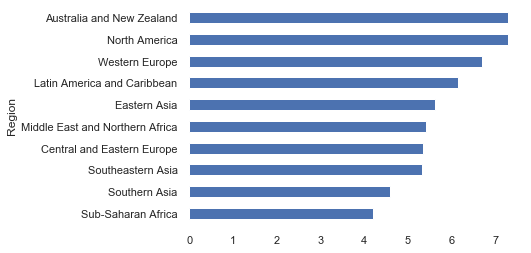

In [11]:
happy_grouped = grouped['Happiness Score']
happy_mean = happy_grouped.mean()
happy_mean.sort_values().plot(kind='barh')

However, what if we wanted to apply more than one kind of aggregation to a column at a time?

For example, suppose we wanted to calculate both the mean and maximum happiness score for each region. Using what we learned so far, we'd have to first calculate the mean, like we did above, and then calculate the maximum separately.

Luckily, however, the **GroupBy.agg()** method can perform both aggregations at once. We can use the following syntax:
```python
GroupedBy.agg([function_name1, function_name2, function_name3])
```
Note that when we pass the functions into the agg() method as arguments, we don't use parentheses after the function names. For example, when we use np.mean, we refer to the function object itself and treat it like a variable, whereas np.mean() would be used to call the function and get the returned value.

The function names can also be passed in as strings, but we won't cover that explicitly in this mission. You can refer to this documentation for more information on this topic.

Let's practice using the agg() method next.

### Instructions

- Apply the GroupBy.agg() method to happy_grouped. Pass a list containing np.mean and np.max into the method. Assign the result to happy_mean_max.
    - As noted above, passing 'mean' and 'max' into the GroupBy.agg() method will also return the same results. However, for answer checking purposes, you'll have to use np.mean and np.max.
- We've also created a custom function named dif to calculate the difference between the mean and maximum values. Pass dif into the GroupBy.agg() method. Assign the result to mean_max_dif.

In [12]:
def dif(group):
    return (group.max() - group.mean())
happy_mean_max = happy_grouped.agg([np.mean, np.max])
display(happy_mean_max)
mean_max_dif = happy_grouped.agg(dif)
mean_max_dif

,mean,amax
Region,,
Australia and New Zealand,7.285000,7.286
Central and Eastern Europe,5.332931,6.505
Eastern Asia,5.626167,6.298
Latin America and Caribbean,6.144682,7.226
Middle East and Northern Africa,5.406900,7.278
North America,7.273000,7.427
Southeastern Asia,5.317444,6.798
Southern Asia,4.580857,5.253
Sub-Saharan Africa,4.202800,5.477


Region
Australia and New Zealand          0.001000
Central and Eastern Europe         1.172069
Eastern Asia                       0.671833
Latin America and Caribbean        1.081318
Middle East and Northern Africa    1.871100
North America                      0.154000
Southeastern Asia                  1.480556
Southern Asia                      0.672143
Sub-Saharan Africa                 1.274200
Western Europe                     0.897381
Name: Happiness Score, dtype: float64

Up until this point, we've deliberately split creating the GroupBy object and calling a function into separate steps to make it easier to understand. However, if you read through other teaching resources, you may see instances in which the statements are combined:
```python
happiness2015.groupby('Region')['Happiness Score'].agg(dif)
```
Both approaches will return the same result. However, if you plan on computing multiple aggregations with the same GroupBy object, it's recommended to save the object to a variable first. You may wish to save it to a variable in all cases to make your code easier to understand. As we compute more complex aggregations, the syntax can get confusing!

### Instructions

- Inspect the following code: **happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean().**
- If we run the code above, will the index of happiness_means be the unique values in the Region column or the Happiness Score column?
- Will the values aggregated in happiness_means be the values from the Region column or the Happiness Score column?
- Print happiness_means. Were your predictions correct?

In [13]:
happiness_means = happiness2015.groupby('Region')['Happiness Score'].mean()
print(happiness_means)

Region
Australia and New Zealand          7.285000
Central and Eastern Europe         5.332931
Eastern Asia                       5.626167
Latin America and Caribbean        6.144682
Middle East and Northern Africa    5.406900
North America                      7.273000
Southeastern Asia                  5.317444
Southern Asia                      4.580857
Sub-Saharan Africa                 4.202800
Western Europe                     6.689619
Name: Happiness Score, dtype: float64


Index and values are actually arguments used in another method used to aggregate data - the DataFrame.pivot_table() method. This df.pivot_table() method can perform the same kinds of aggregations as the df.groupby method and make the code for complex aggregations easier to read.

If you're an Excel user, you may have already drawn comparisons between the groupby operation and Excel pivot tables. If you've never used Excel, don't worry! No prior knowledge is needed for this mission. We'll demonstrate the pivot_table() method next.

Below, we use the df.pivot_table() method to perform the same aggregation as above.

In [14]:
happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean)

,Happiness Score
Region,
Australia and New Zealand,7.285000
Central and Eastern Europe,5.332931
Eastern Asia,5.626167
Latin America and Caribbean,6.144682
Middle East and Northern Africa,5.406900
North America,7.273000
Southeastern Asia,5.317444
Southern Asia,4.580857
Sub-Saharan Africa,4.202800


Keep in mind that this method returns a dataframe, so normal dataframe filtering and methods can be applied to the result. For example, let's use the DataFrame.plot() method to create a visualization. Note that we exclude aggfunc below because the mean is the default aggregation function of df.pivot_table().

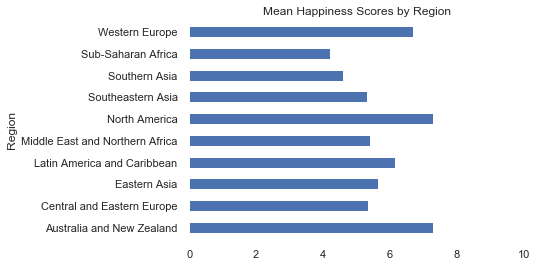

In [15]:
pv_happiness = happiness2015.pivot_table('Happiness Score', 'Region')
pv_happiness.plot(kind='barh', title='Mean Happiness Scores by Region', xlim=(0,10), legend=False)

Next, let's explore a feature unique to the df.pivot_table() method.

### Instructions

We've already updated pv_happiness by setting the margins parameter equal to True.

- Plot the resulting dataframe, pv_happiness, using the df.plot() method. Set kind to barh, xlim to (0,10), title to 'Mean Happiness Scores by Region', and legend to False. What do you notice about this results?
- Calculate the mean of the Happiness Score column in the original happiness 2015 data set. Assign the result to world_mean_happiness.
- Does world_mean_happiness equal the value for the All group? If you can't figure out the answer, don't worry! We'll review this question on the next screen.

5.3757341772151905

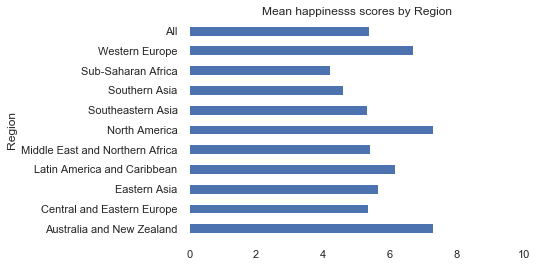

In [16]:
pv_happiness = happiness2015.pivot_table(values='Happiness Score', index='Region', aggfunc=np.mean, margins=True)
pv_happiness.plot(kind='barh', xlim=(0,10), title='Mean happinesss scores by Region', legend=False)
world_mean_happiness = happiness2015['Happiness Score'].mean()
display(world_mean_happiness)

Let's compare the results returned by the groupby operation and the pivot_table method next.

### Instructions

- Use the df.groupby() method to calculate the minimum, maximum, and mean family and happiness scores for each region in happiness2015.
    - Group happiness2015 by the Region column.
    - Select the Happiness Score and Family columns. Assign the result to grouped.
    - Apply the GroupBy.agg() method to grouped. Pass a list containing np.min, np.max, and np.mean into the method.
    - Assign the result to happy_family_stats.
- Use the pivot_table method to return the same information, but also calculate the the minimum, maximum, and mean for the entire Family and Happiness Score columns.
    - The aggregation columns should be Happiness Score and Family.
    - The column to group by is Region.
    - The aggregation functions are np.min, np.max, and np.mean.
    - Set the margins parameter equal to True.
    - Assign the result to pv_happy_family_stats.

In [17]:
grouped = happiness2015.groupby('Region')[['Happiness Score', 'Family']]
happy_family_stats = grouped.agg([np.min, np.max, np.mean])
pv_happy_family_stats = happiness2015.pivot_table(values=['Happiness Score', 'Family'], 
                                                  index='Region', aggfunc=[np.min, np.max, np.mean], margins=True)
display(happy_family_stats)
display(pv_happy_family_stats)

Happiness Score                    Family  \
                                           amin   amax      mean     amin   
Region                                                                      
Australia and New Zealand                 7.284  7.286  7.285000  1.30923   
Central and Eastern Europe                4.218  6.505  5.332931  0.38562   
Eastern Asia                              4.874  6.298  5.626167  0.94675   
Latin America and Caribbean               4.518  7.226  6.144682  0.74302   
Middle East and Northern Africa           3.006  7.278  5.406900  0.47489   
North America                             7.119  7.427  7.273000  1.24711   
Southeastern Asia                         3.819  6.798  5.317444  0.62736   
Southern Asia                             3.575  5.253  4.580857  0.30285   
Sub-Saharan Africa                        2.839  5.477  4.202800  0.00000   
Western Europe                            4.857  7.587  6.689619  0.89318   

                                                    
                                    amax      mean  
Region                                              
Australia and New Zealand        1.31967  1.314450  
Central and Eastern Europe       1.34043  1.053042  
Eastern Asia                     1.30060  1.099427  
Latin America and Caribbean      1.30477  1.104720  
Middle East and Northern Africa  1.22393  0.920490  
North America                    1.32261  1.284860  
Southeastern Asia                1.26504  0.940468  
Southern Asia                    1.10395  0.645321  
Sub-Saharan Africa               1.18468  0.809085  
Western Europe                   1.40223  1.247302

amin                     amax  \
                                  Family Happiness Score   Family   
Region                                                              
Australia and New Zealand        1.30923           7.284  1.31967   
Central and Eastern Europe       0.38562           4.218  1.34043   
Eastern Asia                     0.94675           4.874  1.30060   
Latin America and Caribbean      0.74302           4.518  1.30477   
Middle East and Northern Africa  0.47489           3.006  1.22393   
North America                    1.24711           7.119  1.32261   
Southeastern Asia                0.62736           3.819  1.26504   
Southern Asia                    0.30285           3.575  1.10395   
Sub-Saharan Africa               0.00000           2.839  1.18468   
Western Europe                   0.89318           4.857  1.40223   
All                              0.00000           2.839  1.40223   

                                                     mean                  
                                Happiness Score    Family Happiness Score  
Region                                                                     
Australia and New Zealand                 7.286  1.314450        7.285000  
Central and Eastern Europe                6.505  1.053042        5.332931  
Eastern Asia                              6.298  1.099427        5.626167  
Latin America and Caribbean               7.226  1.104720        6.144682  
Middle East and Northern Africa           7.278  0.920490        5.406900  
North America                             7.427  1.284860        7.273000  
Southeastern Asia                         6.798  0.940468        5.317444  
Southern Asia                             5.253  0.645321        4.580857  
Sub-Saharan Africa                        5.477  0.809085        4.202800  
Western Europe                            7.587  1.247302        6.689619  
All                                       7.587  0.991046        5.375734